In [5]:
pip install yellowbrick

     |████████████████████████████████| 274 kB 2.0 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install Kmeans

  Created wheel for Kmeans: filename=kmeans-1.0.2-cp39-cp39-macosx_10_9_x86_64.whl size=8513 sha256=30e477328deafb2f963944a494787a0403c5e7837d73ffbca4eabc32f9121ed3
  Stored in directory: /Users/apichet/Library/Caches/pip/wheels/69/a7/de/4ca4b6cf9a2fd01b7e6e0191e5221227b9600605c25d012126
Successfully built Kmeans
Note: you may need to restart the kernel to use updated packages.


In [13]:
from sklearn.datasets import make_blobs
import pandas as pd
from sklearn.cluster import KMeans

In [3]:
dataset, classes = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=0.5, random_state=0)
# make as dataframe
df = pd.DataFrame(dataset, columns=['var1', 'var2'])
df.head(2)

,var1,var2
0,2.204387,1.560857
1,-1.133740,2.684673


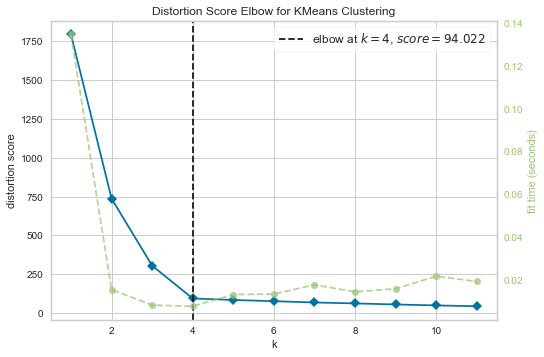

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [14]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(df)
visualizer.show()

In [16]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df)

In [20]:
kmeans.labels_

array([1, 0, 3, 2, 1, 3, 0, 3, 3, 3, 3, 1, 0, 0, 1, 3, 2, 2, 2, 1, 2, 0,
       1, 0, 1, 1, 2, 1, 1, 3, 2, 3, 0, 1, 0, 3, 0, 3, 3, 2, 2, 2, 2, 3,
       1, 0, 3, 2, 2, 3, 2, 0, 0, 2, 3, 2, 0, 1, 3, 1, 2, 3, 1, 3, 2, 3,
       1, 2, 0, 0, 1, 1, 3, 3, 0, 2, 0, 0, 1, 1, 2, 3, 1, 0, 0, 3, 3, 1,
       0, 0, 2, 2, 2, 3, 3, 1, 0, 2, 3, 3, 2, 1, 1, 2, 2, 0, 3, 1, 1, 3,
       2, 0, 0, 1, 1, 3, 0, 0, 2, 3, 2, 0, 3, 1, 3, 0, 3, 0, 1, 3, 0, 1,
       0, 2, 2, 0, 2, 2, 1, 2, 1, 0, 1, 1, 0, 1, 3, 1, 0, 2, 2, 2, 3, 0,
       1, 3, 2, 0, 2, 1, 2, 1, 1, 0, 0, 2, 3, 1, 1, 0, 1, 3, 0, 2, 2, 2,
       3, 3, 0, 3, 0, 1, 3, 1, 3, 0, 0, 2, 3, 2, 1, 1, 3, 2, 0, 0, 0, 3,
       2, 1], dtype=int32)

In [18]:
kmeans.inertia_

94.02242630751755

In [21]:
kmeans.n_iter_

2

In [22]:
kmeans.cluster_centers_

array([[-1.60782913,  2.9162828 ],
       [ 2.06911036,  0.96146833],
       [-1.33173192,  7.7400479 ],
       [ 0.91932803,  4.34824615]])

In [23]:
from collections import Counter
Counter(kmeans.labels_)
Counter({2: 50, 0: 50, 3: 50, 1: 50})

Counter({2: 50, 0: 50, 3: 50, 1: 50})

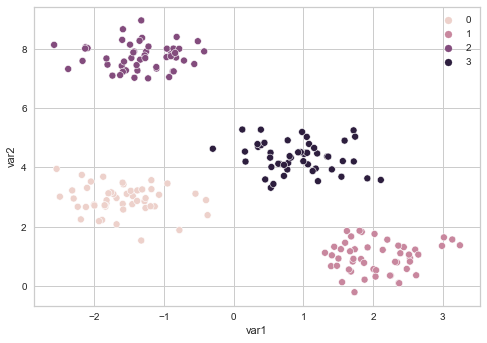

In [24]:
#Visualization of k-means clustering
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=df, x="var1", y="var2", hue=kmeans.labels_)
plt.show()

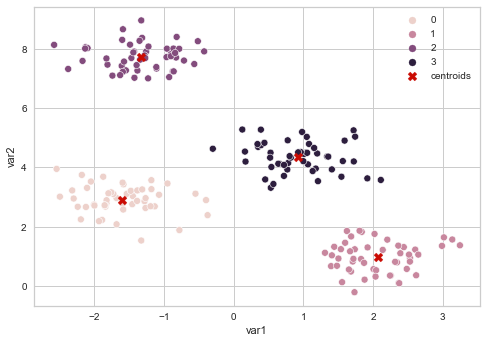

In [25]:
sns.scatterplot(data=df, x="var1", y="var2", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()